In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

class Escena:
    """
    Clase que representa una escena con un punto en un plano.
    """
    def __init__(self, radio=1, punto=np.array([0.0, 0.0]), color='lightblue'):
        """
        Inicializa la escena con un radio, un punto y un color.
        """
        self.radio = radio
        self.punto = np.array(punto, dtype=float)
        self.color = color
        self.validar_posicion()

    def dibujar(self, titulo="Escena", mostrar_norma=True, mostrar_rotacion=False):
        """
        Dibuja la escena con el punto y la circunferencia.
        """
        fig, ax = plt.subplots()
        circ = plt.Circle((0, 0), self.radio, color=self.color, fill=True)
        ax.add_patch(circ)
        ax.plot(self.punto[0], self.punto[1], 'bo')

        ax.set_xlim(-self.radio - 1, self.radio + 1)
        ax.set_ylim(-self.radio - 1, self.radio + 1)
        ax.set_aspect('equal')
        plt.title(titulo)
        plt.show()

    def escalar_Vector(self, escalar):
        """
        Escala el punto por un valor dado.
        """
        self.punto = np.multiply(self.punto, escalar)
        self.validar_posicion()

    def calcular_norma(self):
        """
        Calcula la norma del punto.
        """
        return (self.punto[0]**2 + self.punto[1]**2) ** 0.5

    def calcular_producto_interno(self, Dos_punto):
        """
        Calcula el producto interno del punto con otro punto.
        """
        Dos_punto = np.array(Dos_punto, dtype=float)
        return self.punto[0] * Dos_punto[0] + self.punto[1] * Dos_punto[1]

    def rotar_punto(self, angulo):
        """
        Rota el punto un ángulo dado en grados.
        """
        angulo_rad = np.radians(angulo)
        matriz_rotacion = np.array([[np.cos(angulo_rad), -np.sin(angulo_rad)],
                                    [np.sin(angulo_rad), np.cos(angulo_rad)]])
        self.punto = np.dot(matriz_rotacion, self.punto)
        self.validar_posicion()

    def cambiar_escena(self, radio=None, color=None, punto=None):
        """
        Cambia los atributos de la escena.
        """
        if radio is not None:
            self.radio = radio
        if color is not None:
            self.color = color
        if punto is not None:
            self.punto = np.array(punto, dtype=float)
        self.validar_posicion()

    def desplazar_punto(self, valor, direccion):
        """
        Desplaza el punto en una dirección dada por un valor dado.
        """
        desplazamientos = {
            'derecha': np.array([float(valor), 0.0]),
            'izquierda': np.array([-float(valor), 0.0]),
            'arriba': np.array([0.0, float(valor)]),
            'abajo': np.array([0.0, -float(valor)]),
        }
        if direccion in desplazamientos:
            self.punto += desplazamientos[direccion]
            self.validar_posicion()
        else:
            raise ValueError("Dirección no válida.")
        self.dibujar(f"Después de mover {direccion}", mostrar_norma=False)

    def validar_posicion(self):
        """
        Valida que el punto esté dentro de la circunferencia.
        """
        if np.linalg.norm(self.punto) > self.radio:
            self.punto = self.punto / np.linalg.norm(self.punto) * self.radio

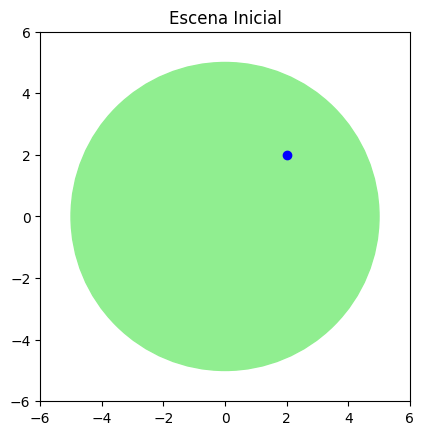

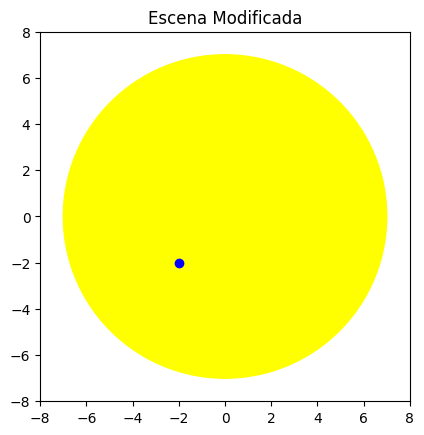

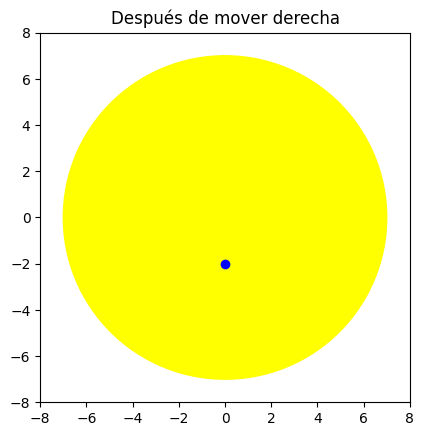

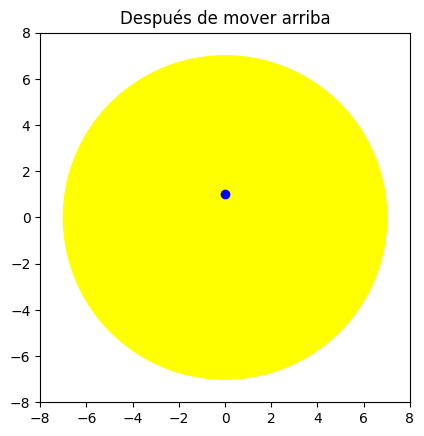

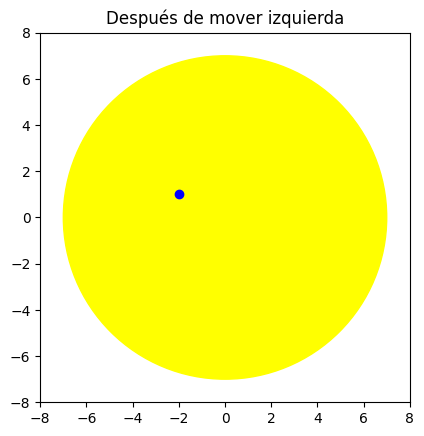

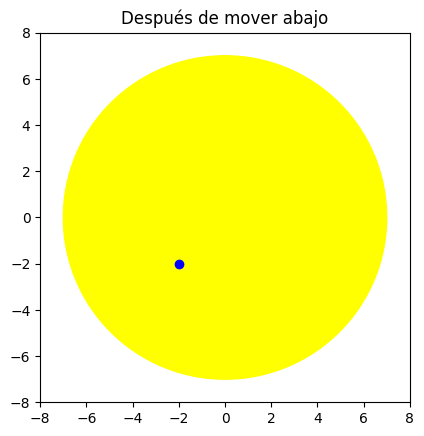

In [ ]:
# Ejecución de las Funciones
escena = Escena(radio=5, color='lightgreen', punto=[2.0, 2.0])
escena.dibujar("Escena Inicial")

escena.cambiar_escena(radio=7, color='yellow', punto=[-2.0, -2.0])
escena.dibujar("Escena Modificada")

# Movimientos en todas las direcciones
escena.desplazar_punto(2.0, 'derecha')
escena.desplazar_punto(3.0, 'arriba')
escena.desplazar_punto(2.0, 'izquierda')
escena.desplazar_punto(3.0, 'abajo')

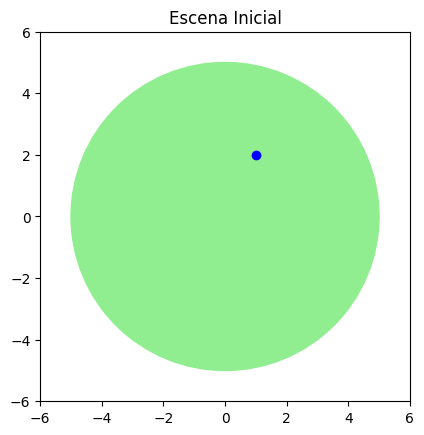

In [ ]:
# Pruebas de la clase
escena = Escena(radio=5, color='lightgreen', punto=[1.0, 2.0])
escena.dibujar("Escena Inicial")



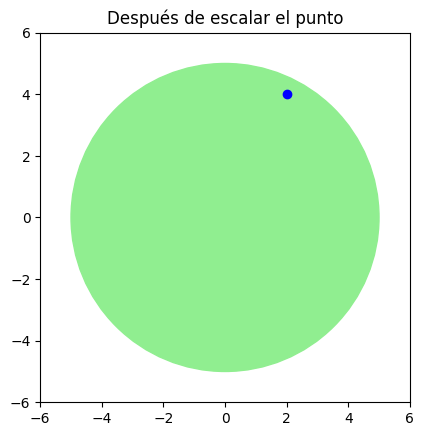

In [ ]:
escena.escalar_Vector(2)
escena.dibujar("Después de escalar el punto")



In [ ]:
print("Norma del punto:", escena.calcular_norma())



Norma del punto: 4.47213595499958


In [ ]:
print("Producto interno con (1,1):", escena.calcular_producto_interno([1.0, 1.0]))


Producto interno con (1,1): 6.0


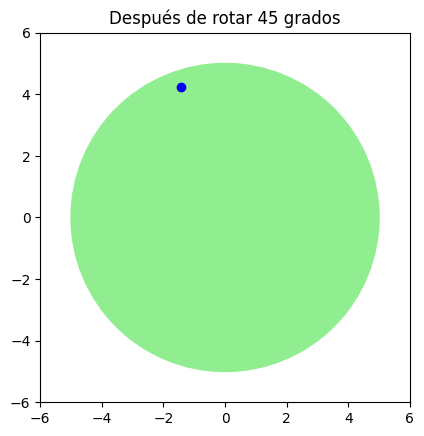

In [ ]:
escena.rotar_punto(45)
escena.dibujar("Después de rotar 45 grados")